# What is a Maxout activation function?

A maxout layer is a type of neural network layer that serves as an activation function. It was introduced by Ian Goodfellow et al. in 2013. The key features of a maxout layer are:

1. Structure: It takes the maximum value across a set of linear functions.
2. Flexibility: It can approximate a wide range of convex functions.
3. Generalization: It generalizes popular activation functions like ReLU and Leaky ReLU.
4. Dropout compatibility: It works particularly well when used with dropout regularization.
5. Gradient flow: It helps mitigate the vanishing gradient problem in deep networks.

Maxout layers offer increased model capacity and can lead to improved performance in various deep learning tasks.


# Formula for Maxout Activation

The maxout activation function is defined as:

$h_i(x) = \max_{j \in [1,k]} z_{ij}$

Where:
- $h_i(x)$ is the output of the $i$-th maxout unit
- $x$ is the input vector
- $z_{ij} = x^T W_{...ij} + b_{ij}$ is the $j$-th linear feature of the $i$-th maxout unit
- $W_{...ij}$ is a weight vector and $b_{ij}$ is a bias term
- $k$ is the number of pieces (linear features) per maxout unit

Diagram:


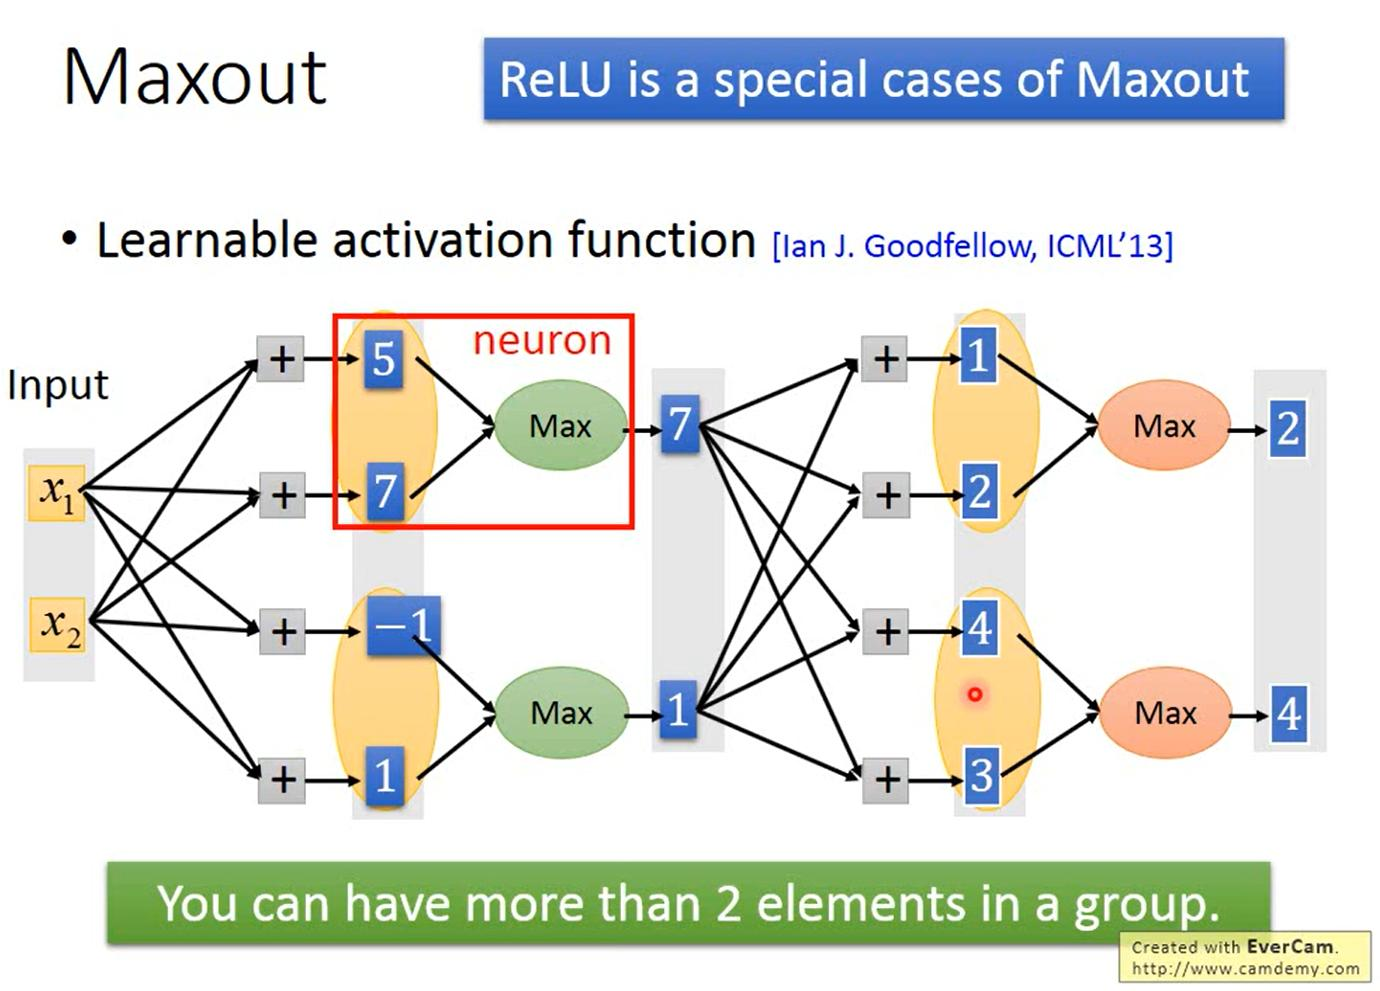

In [2]:
# Maxout Layer in Deep Learning

# A maxout layer is a type of activation function used in neural networks
# It was introduced by Ian Goodfellow et al. in 2013

import torch
import torch.nn as nn

class MaxoutLayer(nn.Module):
    def __init__(self, in_features, out_features, num_pieces):
        super(MaxoutLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.num_pieces = num_pieces
        self.linear = nn.Linear(in_features, out_features * num_pieces)
    
    def forward(self, inputs):
        # Shape: (batch_size, out_features, num_pieces)
        output = self.linear(inputs).view(-1, self.out_features, self.num_pieces)
        return torch.max(output, dim=2)[0]

# Example usage:
in_features = 10
out_features = 5
num_pieces = 3

maxout = MaxoutLayer(in_features, out_features, num_pieces)
input_tensor = torch.randn(32, in_features)  # Batch size of 32
output = maxout(input_tensor)

print(f"Input shape: {input_tensor.shape}")
print(f"Output shape: {output.shape}")

# Key characteristics of Maxout:
# 1. It generalizes the ReLU and Leaky ReLU activations
# 2. It's particularly effective when used with dropout
# 3. It can approximate any convex function
# 4. It helps mitigate the vanishing gradient problem


Input shape: torch.Size([32, 10])
Output shape: torch.Size([32, 5])
